In [ ]:
!pip install tensorflow
!pip install np_utils

     |████████████████████████████████| 61kB 4.5MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-cp37-none-any.whl size=57133 sha256=f23c9207ec4bc3b4009ea2cab9aabf478b25f9cb40c72cfb368167e75ae4b310
  Stored in directory: /root/.cache/pip/wheels/92/4b/81/206efd0d01330a96f3aebe5021d2d5f0b264b7ade827c306ef
Successfully built np-utils


In [ ]:
import keras.utils
import np_utils

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import keras
from sklearn.model_selection import train_test_split


In [ ]:

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

IMPORTANT

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/Untitled folder/archive.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Extraction completed")

Extraction completed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = []
Class = []
no_of_classes = 43
cur_path = '/content/'

for i in range(no_of_classes):
    path = os.path.join(cur_path,'train',str(i))
    all_images = os.listdir(path)
    for a in all_images:
          try:
              imageRGB = Image.open(path + '/'+ a)
              imageRGB = imageRGB.resize((30,30))
              imageRGB = np.array(imageRGB)
              data.append(imageRGB)
              Class.append(i)
          except:
              print("Error")

ARRAY OF IMAGES

In [ ]:
data = np.array(data)
Class = np.array(Class)


X_train, X_test, y_train, y_test = train_test_split(data, Class, test_size=0.2, random_state=42)


y_train = to_categorical(y_train, 43) 
y_test = to_categorical(y_test, 43)
print("successful")

successful


**Convolutional neural network architecture**

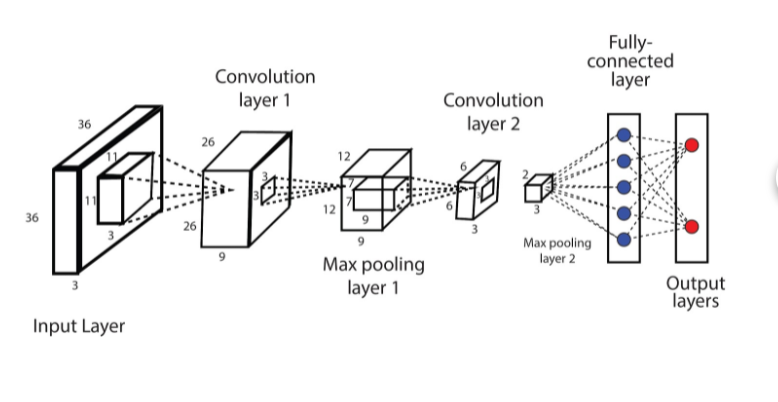

Kernel size

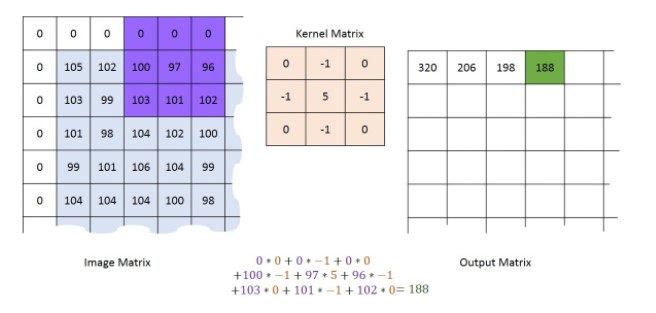

---



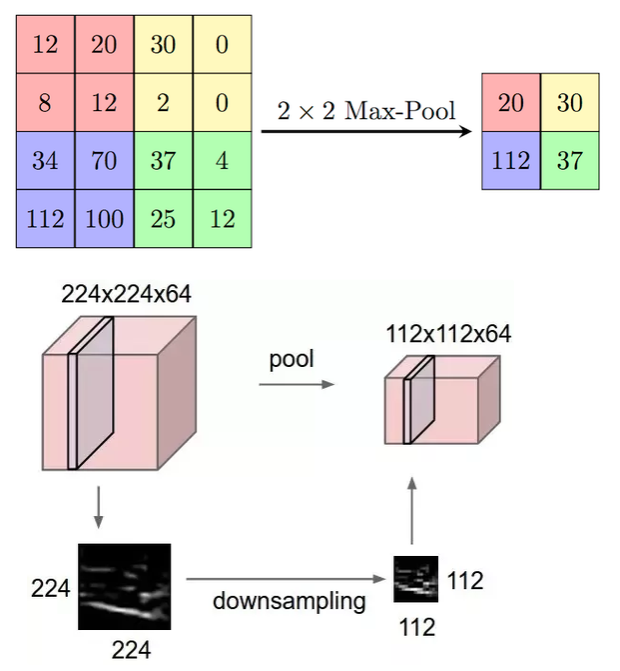

MODEL CREATION 

In [ ]:
model = Sequential()

#first
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

#sec
#model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))

#model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))

#model.add(MaxPool2D(pool_size=(2, 2)))

#model.add(Dropout(rate=0.20))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.20))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(rate=0.6))

model.add(Dense(43, activation='softmax'))

print("Model created successfully")

Model created successfully


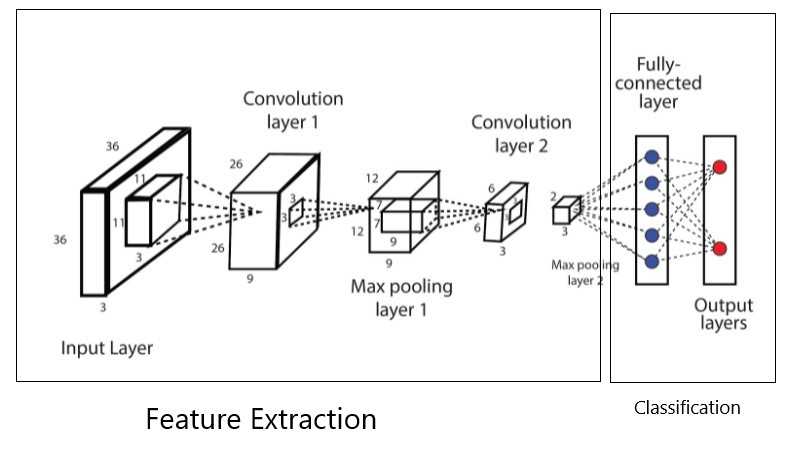

Training The Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelFitting = model.fit(X_train, y_train, batch_size=64, epochs = 20 , validation_data=(X_test, y_test))
print("Model trained successfully")

Epoch 1/20
491/491 [==============================] - 46s 7ms/step - loss: 4.4657 - accuracy: 0.2673 - val_loss: 0.7035 - val_accuracy: 0.8236
Epoch 2/20
491/491 [==============================] - 3s 6ms/step - loss: 0.8073 - accuracy: 0.7591 - val_loss: 0.2547 - val_accuracy: 0.9282
Epoch 3/20
491/491 [==============================] - 3s 5ms/step - loss: 0.4338 - accuracy: 0.8711 - val_loss: 0.1724 - val_accuracy: 0.9568
Epoch 4/20
491/491 [==============================] - 3s 5ms/step - loss: 0.3437 - accuracy: 0.8974 - val_loss: 0.1302 - val_accuracy: 0.9624
Epoch 5/20
491/491 [==============================] - 3s 6ms/step - loss: 0.2970 - accuracy: 0.9123 - val_loss: 0.0843 - val_accuracy: 0.9788
Epoch 6/20
491/491 [==============================] - 3s 6ms/step - loss: 0.2571 - accuracy: 0.9255 - val_loss: 0.0769 - val_accuracy: 0.9799
Epoch 7/20
491/491 [==============================] - 3s 6ms/step - loss: 0.2182 - accuracy: 0.9359 - val_loss: 0.1011 - val_accuracy: 0.9723
Epoch

In [ ]:
model.save("trained_model_new.h5")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)         

**Test Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('/content/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_classes(X_test)

#Accuracy with the test data

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
print("Accuracy : "+str(accuracy_score(labels, pred)*100))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 95.05938242280286


In [ ]:
y_test = pd.read_csv('/content/Test.csv')
labels = y_test["ClassId"].values
print(accuracy_score(labels, pred))

0.9505938242280285


In [ ]:
print(type(pred))
print(pred)



<class 'numpy.ndarray'>
[16  1 38 ... 15  7 10]


CUSTOM TEST


In [ ]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }
print("Classes initialized")

Classes initialized


In [ ]:
model = tf.keras.models.load_model('/content/trained_model_new.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

No entry


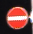

In [ ]:

image = Image.open('/content/00035.png')
image = image.resize((30,30))
image = np.expand_dims(image, axis=0)
image = np.array(image)
pred = model.predict_classes([image])[0]
sign = classes[pred+1]
print(sign)
im = Image.open('/content/00035.png')
im

Speed limit (50km/h)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


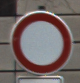

In [ ]:
image = Image.open('/content/stop.png')
image = image.resize((30,30))
image = np.expand_dims(image, axis=0)
image = np.array(image)
pred = model.predict_classes([image])[0]
sign = classes[pred+1]
print(sign)
im = Image.open('/content/stop.png')
im

Graph for the loss


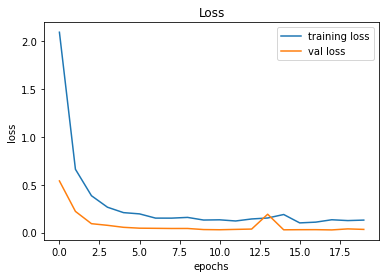

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

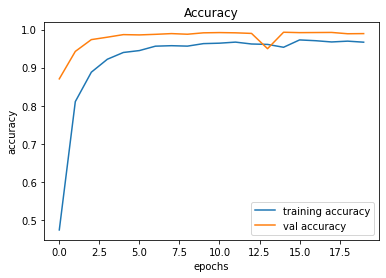

In [ ]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()